# Import Modules

In [1]:
import os
import sys
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
plt.style.use('seaborn-white')

#import glob

**PNC:/home/pkjha/anaconda3/envs/py3_ml/lib/python3.8/site-packages/PseudoNetCDF/pncwarn.py:24:UserWarning:
  pyproj could not be found, so IO/API coordinates cannot be converted to lat/lon; to fix, install pyproj or basemap (e.g., `pip install pyproj)`


# Paths, File Names

In [2]:
netcdf_file_loc = os.path.join(os.path.expanduser('~'), 'Desktop', 'netcdf_files')
met_em_file = os.path.join(netcdf_file_loc, 'metgrid_output', 'met_em.d01.2013-11-21_06:00:00.nc')
wrfinput_file = os.path.join(netcdf_file_loc, 'real_output_chisholmview', 'wrfinput_d01')
wrfbdy_file_1 = os.path.join(netcdf_file_loc, 'real_output_chisholmview','wrfbdy_d01_width1')
wrfbdy_file_5 = os.path.join(netcdf_file_loc, 'real_output_chisholmview','wrfbdy_d01_width5')

# Load NetCDF Data

In [3]:
met_em = xr.open_dataset(met_em_file)
wrfinput = xr.open_dataset(wrfinput_file)
wrfbdy_1 = xr.open_dataset(wrfbdy_file_1)
wrfbdy_5 = xr.open_dataset(wrfbdy_file_5)

# Extract Data to Plot

In [4]:
yz_plane_met_cols, yz_plane_met_rows = np.meshgrid(met_em['south_north'], met_em['num_metgrid_levels'])
xz_plane_met_cols, xz_plane_met_rows = np.meshgrid(met_em['west_east'], met_em['num_metgrid_levels'])

In [5]:
yz_plane_cols, yz_plane_rows = np.meshgrid(wrfbdy_5['south_north'], wrfbdy_5['bottom_top'])
xz_plane_cols, xz_plane_rows = np.meshgrid(wrfbdy_5['west_east'], wrfbdy_5['bottom_top'])

In [6]:
qoi = 'U_BXS'
U_BXS = wrfbdy_5[qoi].isel(Time=0).isel(bdy_width=0)

In [7]:
qoi = 'MU_BXS'
MU_BXS = wrfbdy_5[qoi].isel(Time=0).isel(bdy_width=0)
MU_BXS_tiled = np.tile(MU_BXS, (wrfbdy_5.dims['bottom_top'], 1))

In [8]:
U_BXS_scaled_by_MU_BXS = U_BXS/MU_BXS
#U_BXS_scaled_by_MU_BXS = U_BXS/MU_BXS_tiled

In [9]:
MUB = wrfinput['MUB'].isel(Time=0).isel(west_east=0)
MU = wrfinput['MU'].isel(Time=0).isel(west_east=0)
MUB_tiled = np.tile(MUB, (wrfbdy_5.dims['bottom_top'], 1))
MU_tiled = np.tile(MU, (wrfbdy_5.dims['bottom_top'], 1))

In [10]:
U_BXS_scaled_by_MU = U_BXS/(MUB + MU)

In [11]:
U_met_xlo = met_em['UU'].isel(Time=0).isel(west_east_stag=0)

In [12]:
U_inp_xlo = wrfinput['U'].isel(Time=0).isel(west_east_stag=0)

# Plots

In [13]:
cmap_name = 'rainbow'
south_north_label = 'south_north_index'
west_east_label   = 'west_east_index'
bottom_top_label   = 'bottom_top_index'

Text(0.5, 1.0, 'wrfinput[MU]: west_east = 0, tiled (same at all k-levels)')

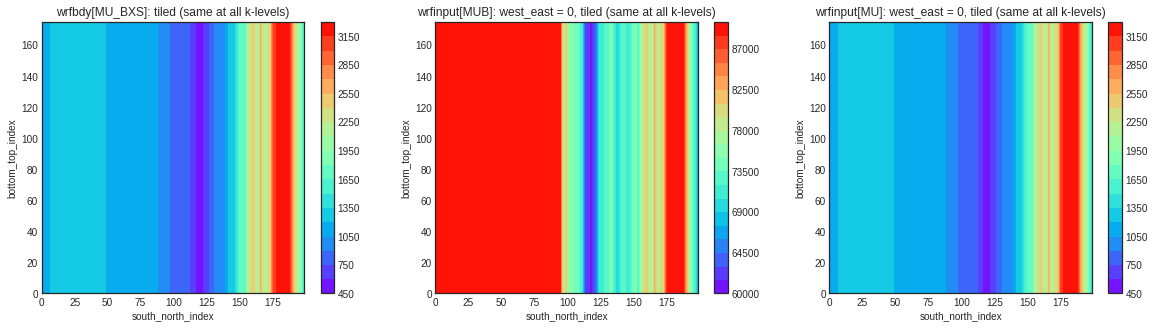

In [14]:
f, axs = plt.subplots(1, 3, figsize = (20, 5) )

plt.subplot(1, 3, 1)
plt.contourf(yz_plane_cols, yz_plane_rows, MU_BXS_tiled, 20, cmap=cmap_name);
plt.colorbar();
plt.xlabel(south_north_label)
plt.ylabel(bottom_top_label)
plt.title('wrfbdy[MU_BXS]' + ': tiled (same at all k-levels)')

plt.subplot(1, 3, 2)
plt.contourf(yz_plane_cols, yz_plane_rows, MUB_tiled, 20, cmap=cmap_name);
plt.colorbar();
plt.xlabel(south_north_label)
plt.ylabel(bottom_top_label)
plt.title('wrfinput[MUB]' + ': west_east = 0, tiled (same at all k-levels)')

plt.subplot(1, 3, 3)
plt.contourf(yz_plane_cols, yz_plane_rows, MU_tiled, 20, cmap=cmap_name);
plt.colorbar();
plt.xlabel(south_north_label)
plt.ylabel(bottom_top_label)
plt.title('wrfinput[MU]' + ': west_east = 0, tiled (same at all k-levels)')

#plt.show()

Text(0.5, 1.0, 'U_BXS: Scaled by MU_BXS')

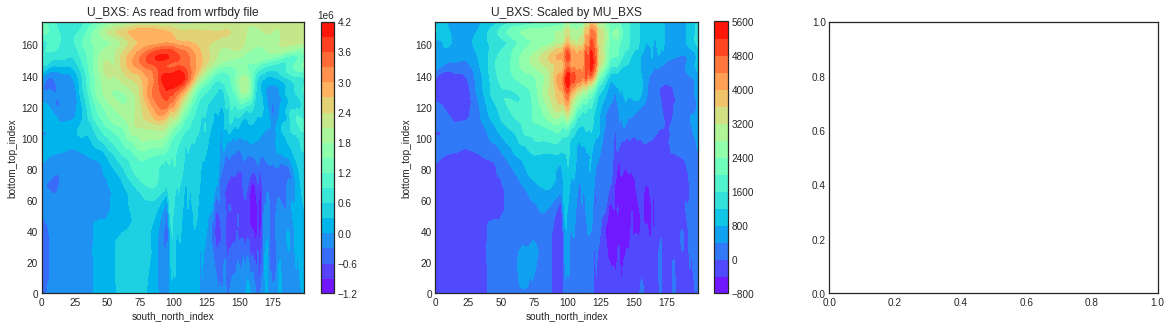

In [15]:
f, axs = plt.subplots(1, 3, figsize = (20, 5) )

plt.subplot(1, 3, 1)
plt.contourf(yz_plane_cols, yz_plane_rows, U_BXS, 20, cmap=cmap_name);
plt.colorbar();
plt.xlabel(south_north_label)
plt.ylabel(bottom_top_label)
plt.title('U_BXS' + ': As read from wrfbdy file')

plt.subplot(1, 3, 2)
plt.contourf(yz_plane_cols, yz_plane_rows, U_BXS_scaled_by_MU_BXS, 20, cmap=cmap_name);
plt.colorbar();
plt.xlabel(south_north_label)
plt.ylabel(bottom_top_label)
plt.title('U_BXS' + ': Scaled by MU_BXS')


Text(0.5, 1.0, 'met_em[UU]: west_east_stag = 0')

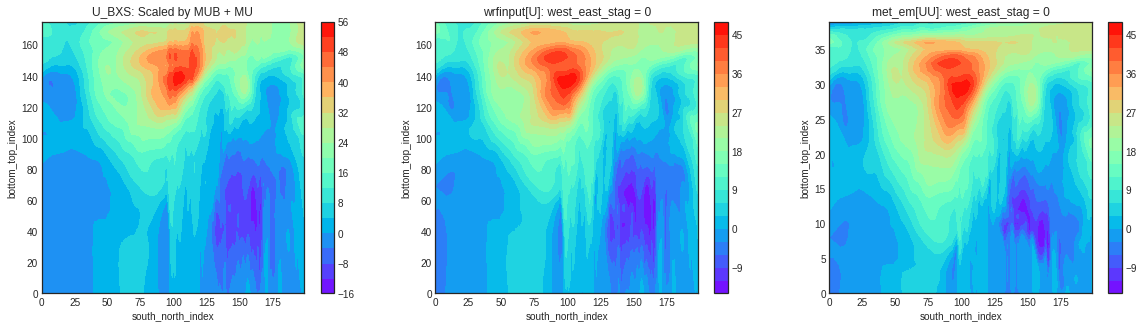

In [16]:
f, axs = plt.subplots(2, 3, figsize = (20, 5) )

plt.subplot(1, 3, 1)
plt.contourf(yz_plane_cols, yz_plane_rows, U_BXS_scaled_by_MU, 20, cmap=cmap_name);
plt.colorbar();
plt.xlabel(south_north_label)
plt.ylabel(bottom_top_label)
plt.title('U_BXS' + ': Scaled by MUB + MU')

plt.subplot(1, 3, 2)
plt.contourf(yz_plane_cols, yz_plane_rows, U_inp_xlo, 20, cmap=cmap_name);
plt.colorbar();
plt.xlabel(south_north_label)
plt.ylabel(bottom_top_label)
plt.title('wrfinput[U]' + ': west_east_stag = 0')

plt.subplot(1, 3, 3)
plt.contourf(yz_plane_met_cols, yz_plane_met_rows, U_met_xlo, 20, cmap=cmap_name);
plt.colorbar();
plt.xlabel(south_north_label)
plt.ylabel(bottom_top_label)
plt.title('met_em[UU]' + ': west_east_stag = 0')